In [263]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import csv
import pandas as pd
     

In [264]:
filename='C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022clean.csv'

In [265]:
pdf = pd.read_csv(filename)
pdf.dropna(subset=['Latitude', 'Longitude','Kedalaman', 'Magnitude','Keterangan'])

,Datetime,Latitude,Longitude,Kedalaman,Magnitude,Type,Keterangan,Dirasakan,M,D,MD
1,1/26/2017,-7.9900,111.2000,10,3.2,MLv,Pusat gempa di darat 20 km Tenggara WONOGIRI-J...,TIDAK,M3,D1,M3D1
3,1/28/2017,-9.4400,113.0600,10,4.7,M,Pusat gempa di laut 138 km Tenggara MALANG-JATIM,TIDAK,M4,D1,M4D1
4,1/29/2017,-9.7300,112.8700,10,4.9,MLv,Pusat gempa di laut 166 km tenggara Kab. Malan...,TIDAK,M4,D1,M4D1
5,1/30/2017,-8.3400,108.5400,103,3.5,MLv,"Pusat gempa di laut,74 km Barat Daya Pangandar...",TIDAK,M3,D2,M3D2
7,2/1/2017,-7.4800,109.0000,216,3.3,MLv,Pusat gempa di darat 15 km Barat Laut Banyumas...,TIDAK,M3,D2,M3D2
...,...,...,...,...,...,...,...,...,...,...,...
2153,12/27/2022,-7.8601,110.5298,13,1.3,MLv,Pusat gempa di darat 13 km Tenggara Tegal,TIDAK,M1,D1,M1D1
2154,12/28/2022,-8.8718,112.4565,44,3.2,MLv,Pusat gempa di laut 92 km Tenggara Blitar,TIDAK,M3,D1,M3D1
2155,12/29/2022,-9.0316,112.1481,10,3.2,MLv,Pusat gempa di laut 103 km Selatan Blitar,TIDAK,M3,D1,M3D1
2156,12/30/2022,-10.2996,113.2803,10,3.6,MLv,Pusat gempa di laut 241 km BaratDaya Jember,TIDAK,M3,D1,M3D1


In [266]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Datetime    2158 non-null   object 
 1   Latitude    2158 non-null   float64
 2   Longitude   2158 non-null   float64
 3   Kedalaman   2158 non-null   int64  
 4   Magnitude   2158 non-null   float64
 5   Type        1742 non-null   object 
 6   Keterangan  1750 non-null   object 
 7   Dirasakan   1750 non-null   object 
 8   M           1750 non-null   object 
 9   D           1750 non-null   object 
 10  MD          1750 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 185.6+ KB


In [267]:

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [268]:
llon = 105.5
ulon = 114.5
llat = -8.5
ulat = -6

In [269]:

pdf = pdf[(pdf['Longitude'] > llon) & (pdf['Longitude'] < ulon) & (pdf['Latitude'] > llat) &(pdf['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

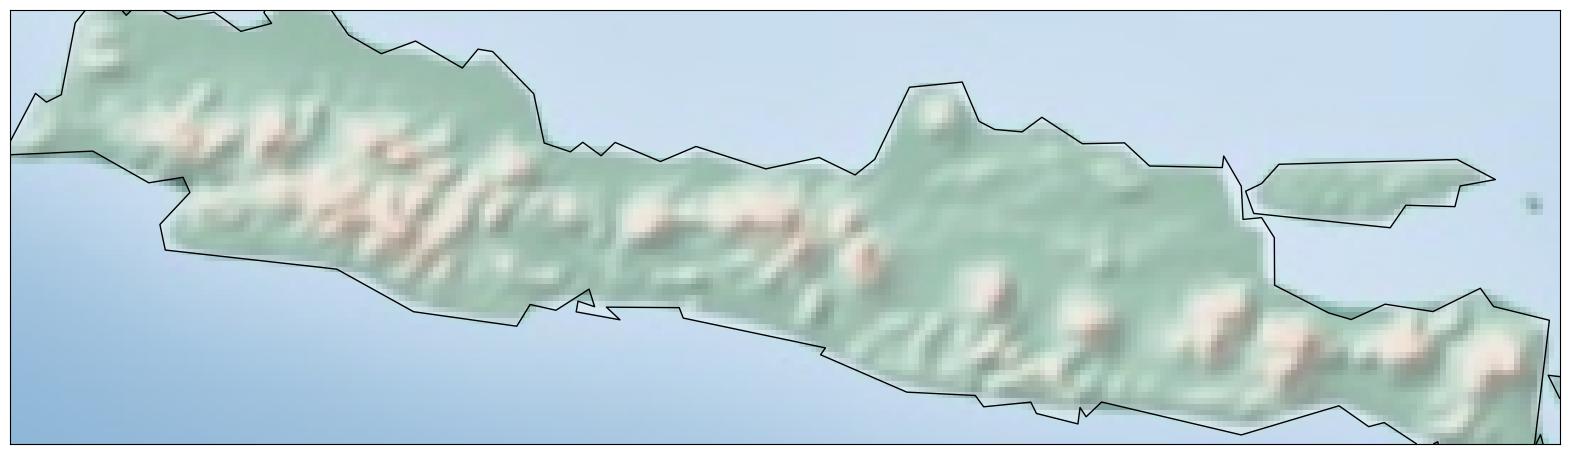

In [270]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

In [271]:
xs,ys = my_map(np.asarray(pdf.Longitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

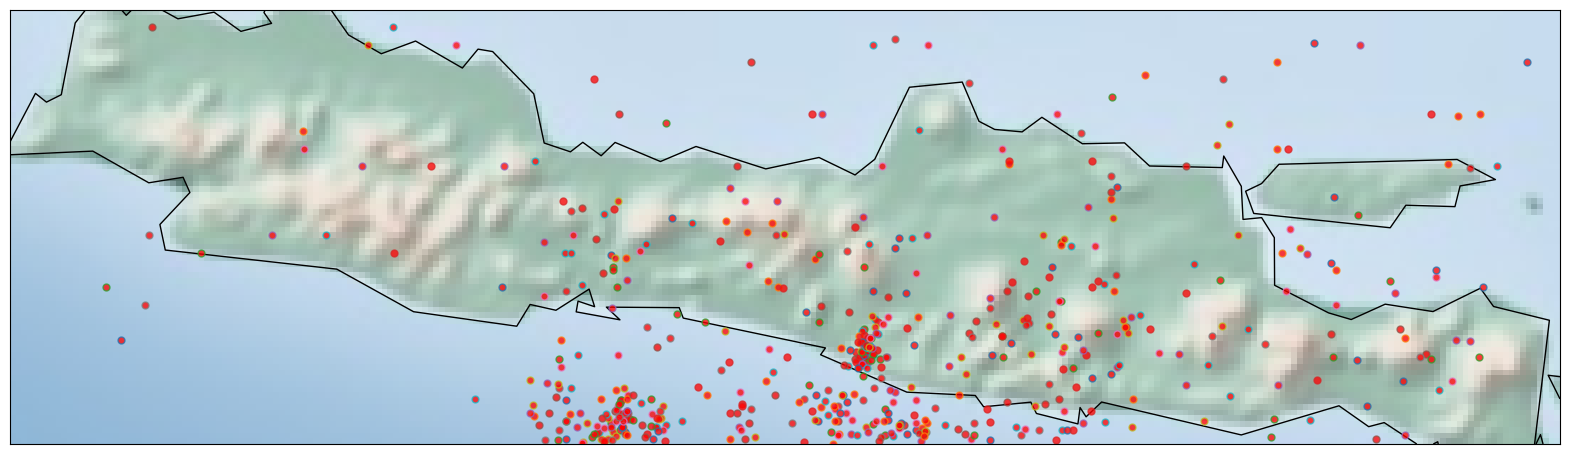

In [272]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
for index, row in pdf.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([1, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

In [273]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [274]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [275]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [276]:

labels

array([-1,  0, -1,  0, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1,  0,  0,  0,
        1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1,  1, -1,  1, -1, -1,  0,  1,  1, -1, -1, -1, -1, -1,  0,  1, -1,
       -1,  0,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  0,
       -1, -1, -1,  0, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  0, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  1, -1,  0,  0, -1, -1,  1, -1, -1, -1, -1,  1,  0,
       -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,  1,  0,  0,  0, -1,  0,
        1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1, -1, -1, -1,  0,  1, -1,  0,  0, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  1,  0, -1,  1, -1, -1,  0, -1,  1,  1,  1, -1,
       -1,  0,  1, -1, -1, -1,  0, -1, -1, -1,  1, -1,  1, -1, -1,  0,  1,
        1,  1, -1, -1, -1

In [277]:

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [278]:
pdf[["Kedalaman", "Clus_Db"]].head(5)

,Kedalaman,Clus_Db
1,10,-1
5,103,0
7,216,-1
13,30,0
14,17,-1


In [279]:
set(labels)

{-1, 0, 1}

In [280]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

Cluster 0, Avg Depth: 31.451612903225808
Cluster 1, Avg Depth: 28.417218543046356


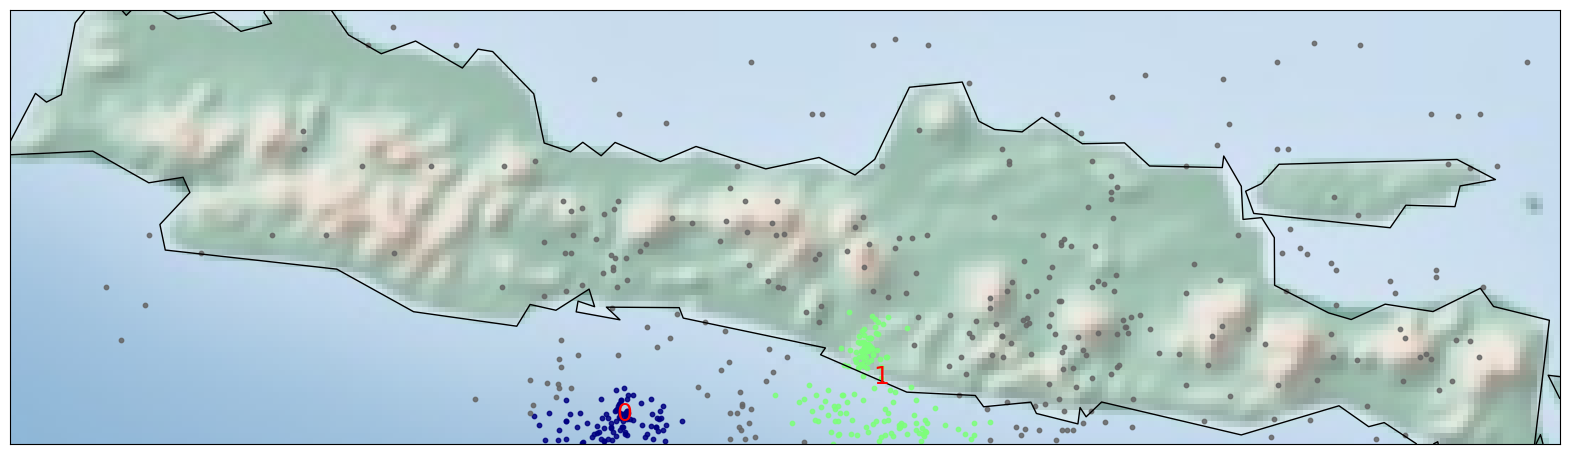

In [281]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Depth: '+ str(np.mean(clust_set.Kedalaman)))

In [282]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [283]:
pdf['Datetime'] = pd.to_datetime(pdf['Datetime'], errors='coerce')
start_year = 2017
end_year = 2022
filtered_data = pdf[(pdf['Datetime'].dt.year >= start_year) & (pdf['Datetime'].dt.year <= end_year)]

In [284]:
filtered_data['Year'] = filtered_data['Datetime'].dt.year

In [285]:
yearly_data = {}

for year, group in filtered_data.groupby('Year'):
    yearly_data[year] = group.copy()

In [286]:
filtered_data['Timestamp'] = filtered_data['Datetime'].apply(lambda x: datetime.timestamp(x))

In [287]:
# Parameter klasterisasi
epsilon = 0.15
min_samples = 10

In [288]:
for year, data in yearly_data.items():
    Clus_dataSet = data[['Latitude', 'Longitude']]
    Clus_dataSet = np.nan_to_num(Clus_dataSet)
    Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
        
    # Klasterkan data menggunakan DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)
    
    # Tambahkan kolom Clus_Db ke DataFrame
    data['Clus_Db'] = db.labels_

In [289]:
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)
labels = db.labels_
group["Clus_Db"] = labels

In [290]:
labels

array([-1, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,
       -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0, -1,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0], dtype=int64)

for year in range(start_year, end_year + 1):
    year_data = filtered_data[filtered_data['Datetime'].dt.year == year]
    cluster_labels = year_data['Clus_Db'].unique()
    
    print(f"Year: {year}")
    for cluster_label in cluster_labels:
        if cluster_label == -1:
            continue
        cluster_data = year_data[year_data['Clus_Db'] == cluster_label]
        avg_depth = cluster_data['Datetime'].mean()
        print(f"Cluster {cluster_label}, Avg Depth: {avg_depth}")

In [291]:
cluster_data_by_year = {}

for year in range(2017, 2023):
    year_data = filtered_data[filtered_data['Datetime'].dt.year == year]
    cluster_labels = year_data['Clus_Db'].unique()
    clusters = []

    print(f"Year: {year}")
    for cluster_label in cluster_labels:
        if cluster_label == -1:
            continue
        cluster_data = year_data[year_data['Clus_Db'] == cluster_label]
        avg_depth = cluster_data['Datetime'].mean()
        print(f"Cluster {cluster_label}, Avg Depth: {avg_depth}")
        clusters.append((cluster_label, avg_depth))

    cluster_data_by_year[year] = clusters

Year: 2017
Cluster 0, Avg Depth: 2017-05-09 12:00:00
Cluster 1, Avg Depth: 2017-07-30 00:00:00
Year: 2018
Cluster 1, Avg Depth: 2018-06-23 10:54:32.727272704
Cluster 0, Avg Depth: 2018-09-06 01:36:00
Year: 2019
Cluster 0, Avg Depth: 2019-07-30 19:12:00
Cluster 1, Avg Depth: 2019-08-27 09:36:00
Year: 2020
Cluster 1, Avg Depth: 2020-05-18 00:00:00
Cluster 0, Avg Depth: 2020-07-21 04:21:49.090909184
Year: 2021
Cluster 0, Avg Depth: 2021-05-16 04:48:00
Cluster 1, Avg Depth: 2021-07-22 05:32:18.461538560
Year: 2022
Cluster 1, Avg Depth: 2022-06-27 04:48:00
Cluster 0, Avg Depth: 2022-07-10 10:26:05.217391360


In [293]:
cluster_data_by_year = pd.DataFrame(columns=['Year', 'Cluster', 'Avg Depth'])

for year in range(2017, 2023):
    year_data = filtered_data[filtered_data['Datetime'].dt.year == year]
    cluster_labels = year_data['Clus_Db'].unique()

    print(f"Year: {year}")
    for cluster_label in cluster_labels:
        if cluster_label == -1:
            continue
        cluster_data = year_data[year_data['Clus_Db'] == cluster_label]
        avg_depth = cluster_data['Datetime'].mean()
        print(f"Cluster {cluster_label}, Avg Depth: {avg_depth}")
        row = pd.DataFrame({'Year': [year], 'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
        cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)

print(cluster_data_by_year)

Year: 2017
Cluster 0, Avg Depth: 2017-05-09 12:00:00
Cluster 1, Avg Depth: 2017-07-30 00:00:00
Year: 2018
Cluster 1, Avg Depth: 2018-06-23 10:54:32.727272704
Cluster 0, Avg Depth: 2018-09-06 01:36:00
Year: 2019
Cluster 0, Avg Depth: 2019-07-30 19:12:00
Cluster 1, Avg Depth: 2019-08-27 09:36:00
Year: 2020
Cluster 1, Avg Depth: 2020-05-18 00:00:00
Cluster 0, Avg Depth: 2020-07-21 04:21:49.090909184
Year: 2021
Cluster 0, Avg Depth: 2021-05-16 04:48:00
Cluster 1, Avg Depth: 2021-07-22 05:32:18.461538560
Year: 2022
Cluster 1, Avg Depth: 2022-06-27 04:48:00
Cluster 0, Avg Depth: 2022-07-10 10:26:05.217391360
    Year Cluster                     Avg Depth
0   2017       0 2017-05-09 12:00:00.000000000
1   2017       1 2017-07-30 00:00:00.000000000
2   2018       1 2018-06-23 10:54:32.727272704
3   2018       0 2018-09-06 01:36:00.000000000
4   2019       0 2019-07-30 19:12:00.000000000
5   2019       1 2019-08-27 09:36:00.000000000
6   2020       1 2020-05-18 00:00:00.000000000
7   2020      

In [295]:
print(cluster_data_by_year)

    Year Cluster                     Avg Depth
0   2017       0 2017-05-09 12:00:00.000000000
1   2017       1 2017-07-30 00:00:00.000000000
2   2018       1 2018-06-23 10:54:32.727272704
3   2018       0 2018-09-06 01:36:00.000000000
4   2019       0 2019-07-30 19:12:00.000000000
5   2019       1 2019-08-27 09:36:00.000000000
6   2020       1 2020-05-18 00:00:00.000000000
7   2020       0 2020-07-21 04:21:49.090909184
8   2021       0 2021-05-16 04:48:00.000000000
9   2021       1 2021-07-22 05:32:18.461538560
10  2022       1 2022-06-27 04:48:00.000000000
11  2022       0 2022-07-10 10:26:05.217391360


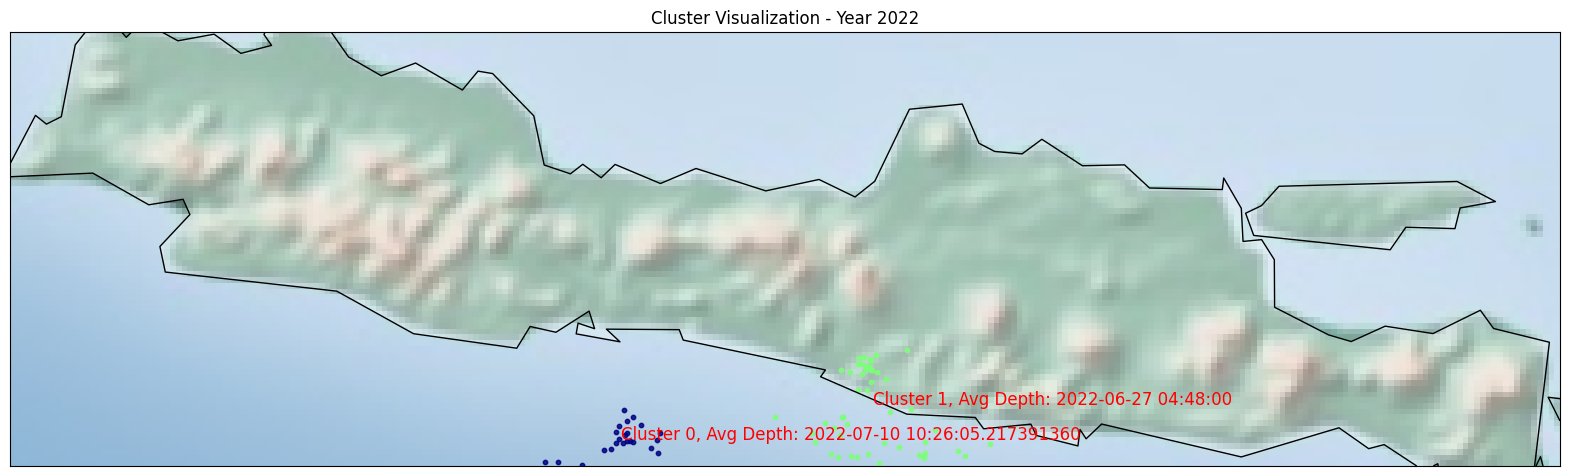

In [296]:
    my_map = Basemap(projection='merc',
                     resolution='l', area_thresh=1000.0,
                     llcrnrlon=llon, llcrnrlat=llat,
                     urcrnrlon=ulon, urcrnrlat=ulat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.fillcontinents(color='white', alpha=0.3)
    my_map.shadedrelief()

    colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(cluster_labels)))

    for clust_number in cluster_labels:
        if clust_number == -1:
            continue
        c = ([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)]
        clust_set = year_data[year_data.Clus_Db == clust_number]
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color=c, marker='o', s=10, alpha=0.85)
        avg_depth = clust_set['Datetime'].mean()
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')

    plt.title(f"Cluster Visualization - Year {year}")
    plt.show()

Cluster 0, Avg Depth: 2022-07-10 10:26:05.217391360


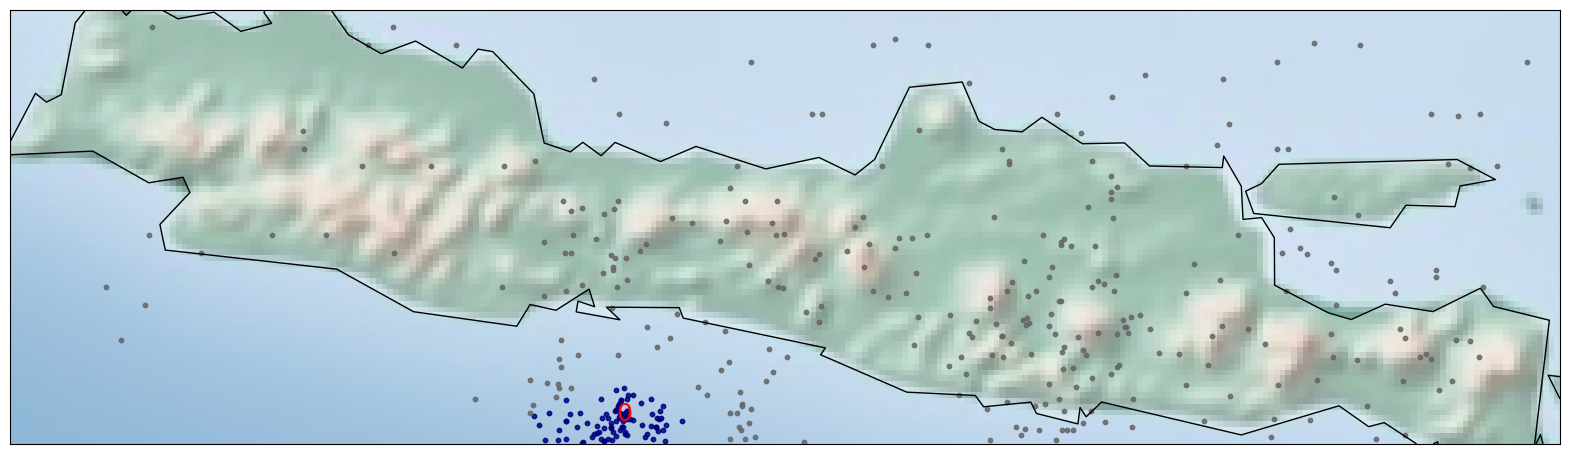

In [297]:
my_map = Basemap(projection='merc',
                     resolution='l', area_thresh=1000.0,
                     llcrnrlon=llon, llcrnrlat=llat,
                     urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c = ([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)]
    clust_set = filtered_data[filtered_data.Clus_Db == clust_number]
    xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
    my_map.scatter(xm, ym, color=c, marker='o', s=10, alpha=0.85)
    if clust_number != -1:
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print("Cluster " + str(clust_number) + ', Avg Depth: ' + str(avg_depth))

plt.show()

In [298]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)


In [299]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [300]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [301]:
labels

array([-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [302]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [303]:
pdf[["Magnitude", "Clus_Db"]].head(5)

,Magnitude,Clus_Db
1,3.2,-1
5,3.5,-1
7,3.3,-1
13,3.1,0
14,2.9,-1


In [304]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

Cluster 0, Avg Magnitude: 3.211111111111111
Cluster 1, Avg Magnitude: 1.5941176470588234
Cluster 2, Avg Magnitude: 2.4909090909090916


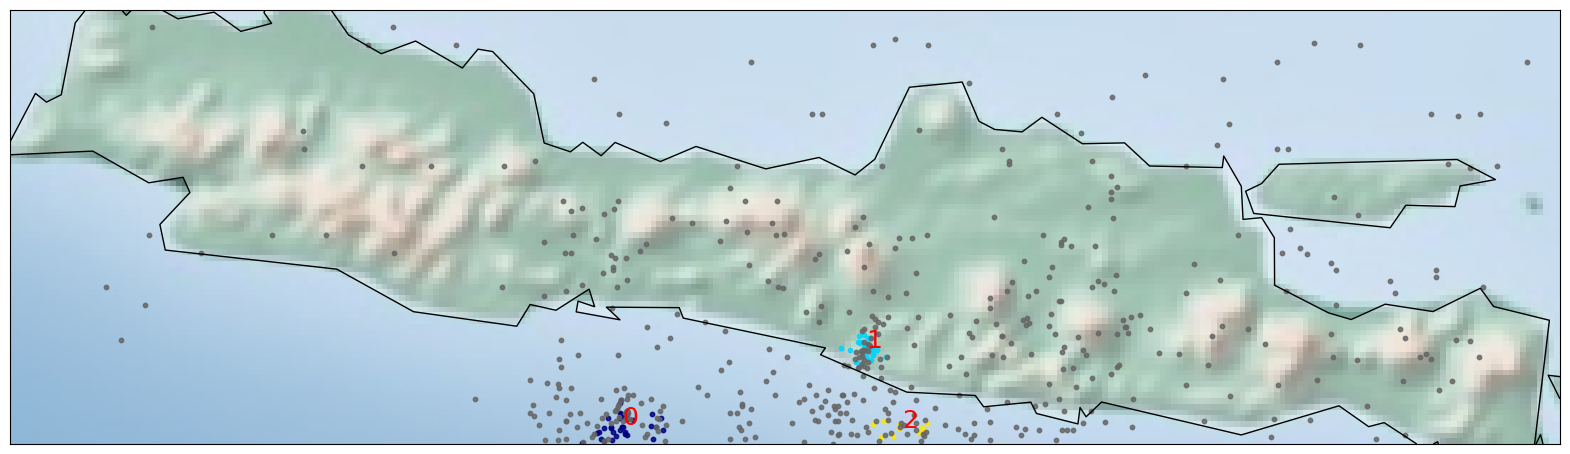

In [305]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

In [306]:
# Filter data berdasarkan wilayah tertentu
filtered_data = pdf[(pdf['Longitude'] > llon) & (pdf['Longitude'] < ulon) & (pdf['Latitude'] > llat) & (pdf['Latitude'] < ulat)]

# Pilih kolom yang ingin diekspor
export_data = filtered_data[['Longitude', 'Latitude', 'Kedalaman', 'Magnitude', 'Keterangan']]

# Export data ke file CSV
export_data.to_csv('filtered_data_pulau_jawa.csv', index=False)

